# preparation for data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Loading CSV file into pandas DataFrame
data = pd.read_csv("final_data.csv")
print(data)

# Drop the rows with no values
data = data.dropna()

# Define features (X) and target variable (y)
features = data.drop(columns=['mental score'])
target = data['mental score']

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

FileNotFoundError: [Errno 2] No such file or directory: 'final_data.csv'

# For data training & prediction

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state=42)

# Training through Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

Mean Squared Error: 3.3333312499999996
    Age  anxiety level  sleeping hours  social support  Gender_Female  \
76   20              9               8               2           True   
64   23              8               4               5           True   
58   26              9               7               7          False   
43   23              9               6               2           True   
12   21              9               4               3           True   
..  ...            ...             ...             ...            ...   
23   28              5               7               8          False   
63   21              2               5               3          False   
74   18              5               5               4           True   
17   27              7               6               4          False   
54   23              8               4               7           True   

    Gender_Male  previous mental record_Maybe  previous mental record_No  \
76      

Predicting


In [ ]:
example_data = pd.DataFrame({
    'Age': [22],
    'Gender': ['Female'],
    'previous mental record': ['No'],
    'mood swings': ['Yes'],
    'Are you sad right now': ['No'],
    'anxiety level': [8],
    'sleeping hours': [6],
    'social support': [8],
    'family support': [6],
    'relationship': ['Yes'],
    'BMI Normal Weight': [1],
    'salary': [20000],
    'Occupation Student': [1],
    'weekly depression_thrice or quarte': [1],
    'residing withf family No': [1],
    'personality type Extrovert': [1],
    'location Dhaka': [1]
})


example_data = pd.get_dummies(example_data)
predicted_score = model.predict(example_data)
print("Predicted Mental Score:", predicted_score[0])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BMI Normal Weight
- Occupation Student
- family support
- location Dhaka
- personality type Extrovert
- ...
Feature names seen at fit time, yet now missing:
- Are you sad right now_I don't know
- Are you sad right now_Maybe
- Are you sad right now_Yes
- BMI_Normal Weight
- BMI_Overweight
- ...


# Modified with data pre processing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('final_data.csv')

# Separate features and target variable
X = data.drop(columns=['mental score'])
y = data['mental score']

# Convert 'Salary' column to numeric after replacing missing values and commas
data['salary'] = data['salary'].str.replace(',', '')  # Remove commas
data['salary'] = data['salary'].fillna(data['salary'].median())  # Impute missing values with median
data['salary'] = data['salary'].astype(float)  # Convert to float



print(data['salary'].unique())
print(data.dtypes)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['Age', 'sleeping hours', 'anxiety level', 'social support', 'salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Occupation', 'BMI', 'weekly deppression', 'residing with family',
                        'location', 'personality type', 'relationship', 'Are you sad right now',
                    'family support', 'previous mental record', 'mood swings']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)




[    0.  6000. 40000. 20000. 60000. 65000. 24000. 41000. 10000.  3000.
 50000. 15000. 17000. 18000.  9000. 28000.  1000.]
Age                         int64
Gender                     object
previous mental record     object
mood swings                object
Are you sad right now      object
mental score                int64
anxiety level               int64
sleeping hours              int64
social support              int64
family support             object
relationship               object
BMI                        object
salary                    float64
Occupation                 object
weekly deppression         object
residing with family       object
personality type           object
location                   object
dtype: object


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '17,000'

# FINAL

Sara

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
data = pd.read_csv('final_data.csv')

data['salary'] = data['salary'].str.replace(',', '')

data['salary'] = pd.to_numeric(data['salary'], errors='coerce')

median_salary = data['salary'].median()
data['salary'] = data['salary'].fillna(median_salary)

X = data.drop(columns=['mental score'])
y = data['mental score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Age', 'sleeping hours', 'anxiety level', 'social support', 'salary']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Occupation', 'BMI', 'weekly deppression', 'residing with family',
                        'location', 'personality type', 'relationship', 'Are you sad right now',
                        'family support', 'previous mental record', 'mood swings']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#using rf
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)


Train Mean Squared Error: 0.43466923076923075
Test Mean Squared Error: 4.177282352941177


Tahmina


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and preprocess the dataset
data = pd.read_csv('final_data.csv')
data['salary'] = data['salary'].str.replace(',', '').astype(float)  # Cleaning salary data
median_salary = data['salary'].median()
data['salary'] = data['salary'].fillna(median_salary)
data['log_salary'] = np.log1p(data['salary'])  # Adding logarithmic transformation of salary

X = data.drop(columns=['mental score', 'salary'])  # Dropping original salary to use log_salary instead
y = data['mental score']

# Rescale the target variable
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = ['Age', 'sleeping hours', 'anxiety level', 'social support', 'log_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Occupation', 'BMI', 'weekly deppression', 'residing with family',
                        'location', 'personality type', 'relationship', 'Are you sad right now',
                        'family support', 'previous mental record', 'mood swings']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define and configure the model to use RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train and predict
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate and print MSE for both train and test data
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

FileNotFoundError: [Errno 2] No such file or directory: 'final_data.csv'

# Tahmina Final


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and preprocess the dataset
data = pd.read_csv('augmented_final_data.csv')
data['salary'] = data['salary'].astype(str).str.replace(',', '').astype(float)  # Converting to string, cleaning salary data, then converting to float
median_salary = data['salary'].median()
data['salary'] = data['salary'].fillna(median_salary)  # Handling missing values in salary
data['log_salary'] = np.log1p(data['salary'])  # Adding logarithmic transformation of salary

X = data.drop(columns=['mental score', 'salary'])  # Dropping original salary to use log_salary instead
y = data['mental score']

# Rescale the target variable
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = ['Age', 'sleeping hours', 'anxiety level', 'social support', 'log_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Occupation', 'BMI', 'weekly deppression', 'residing with family',
                        'location', 'personality type', 'relationship', 'Are you sad right now',
                        'family support', 'previous mental record', 'mood swings']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define and configure the model to use RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Set up GridSearchCV to find the best parameters to prevent overfitting
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predictions with the best model
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Recalculate MSE with the best model
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print("Best Parameters:", grid_search.best_params_)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)





Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 150}
Train Mean Squared Error: 0.03967014881965732
Test Mean Squared Error: 0.10627452952260155


# Data Visualization

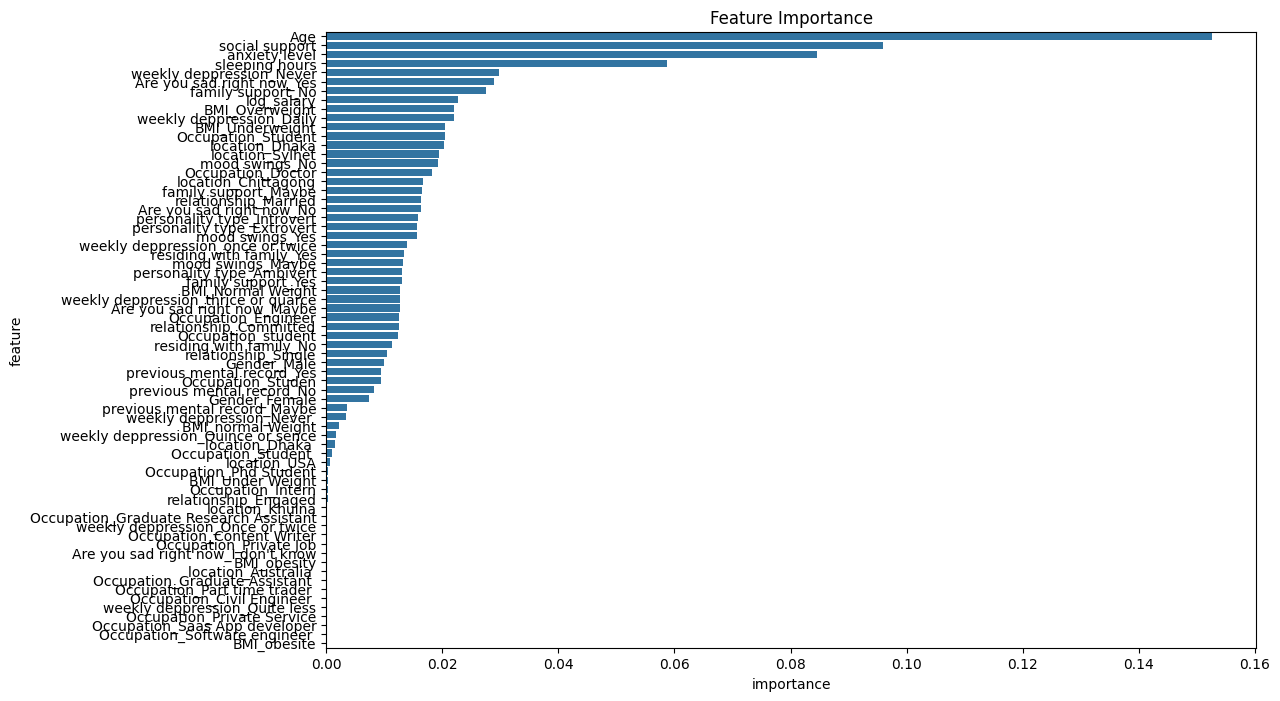

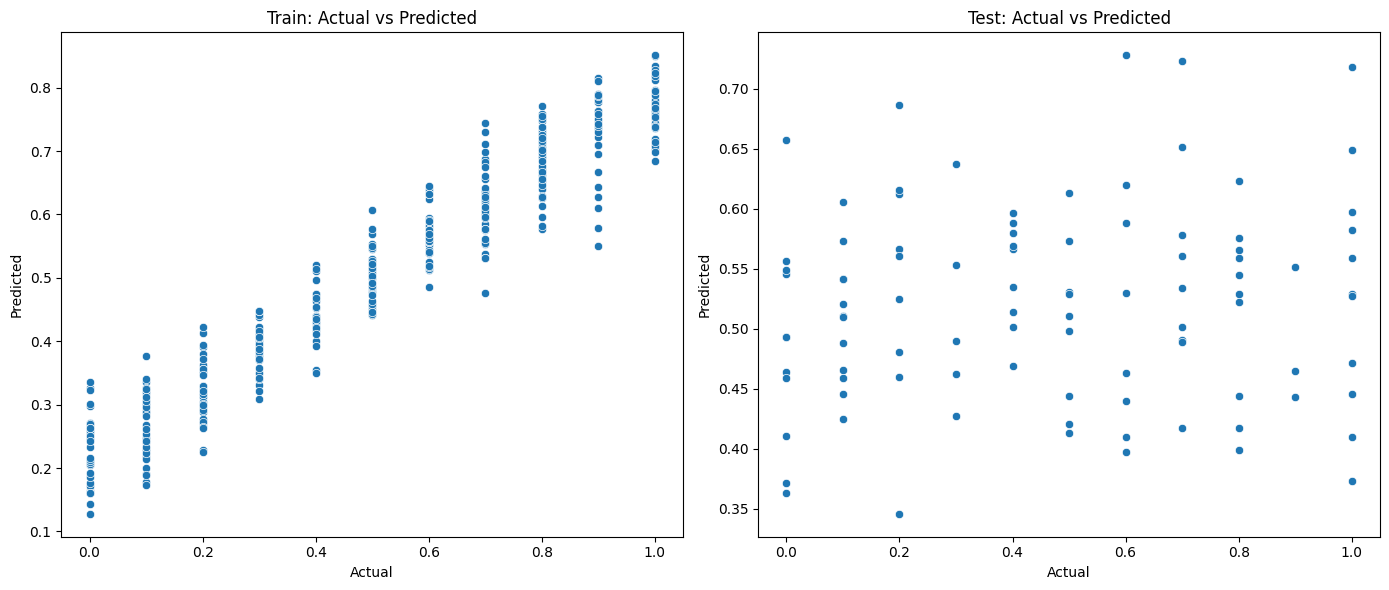

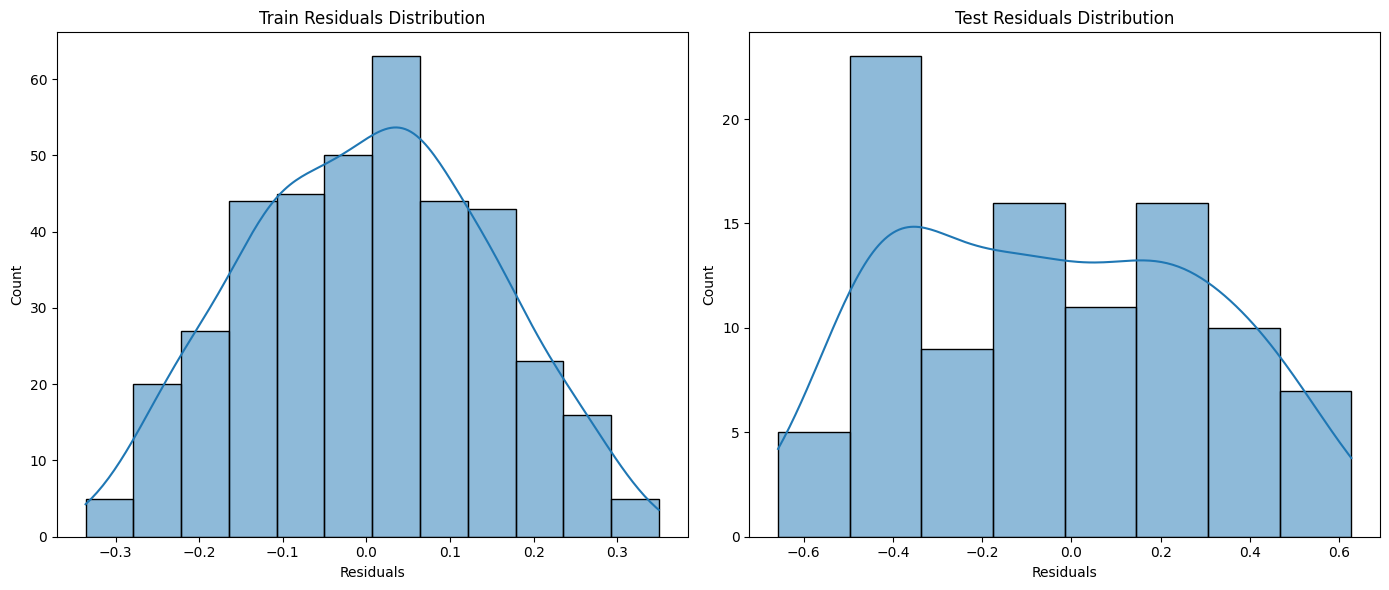

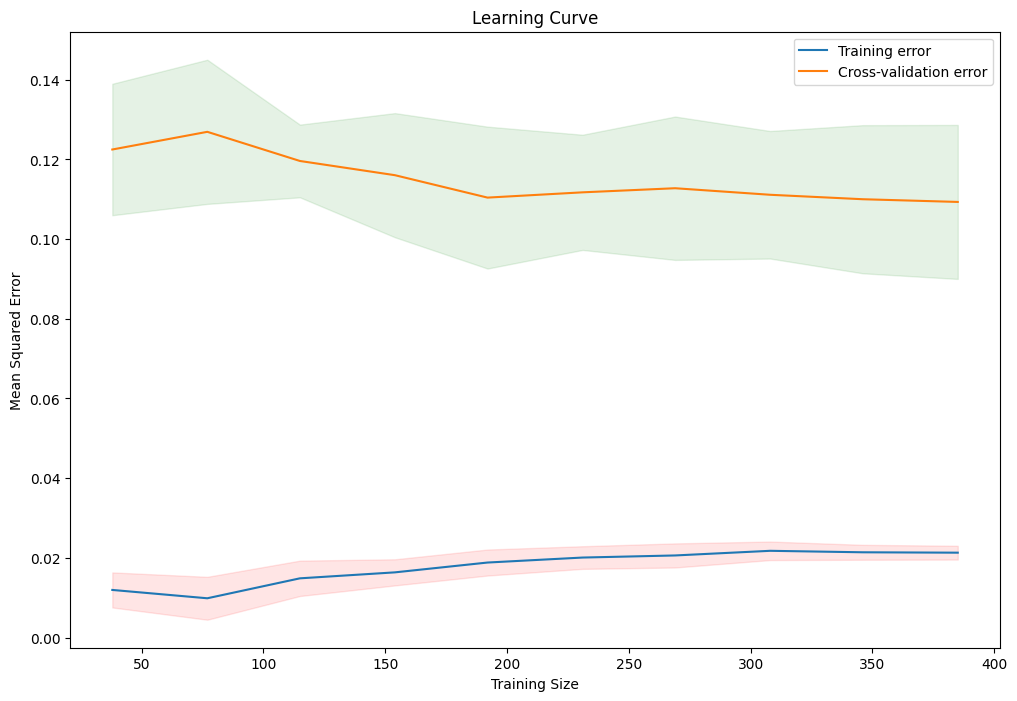

In [ ]:
# Data Visualization Code
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Ensure plots are displayed in the notebook
%matplotlib inline

# Feature importance
def plot_feature_importance(model, X):
    importances = model.named_steps['regressor'].feature_importances_
    feature_names = model.named_steps['preprocessor'].transformers_[0][2] + model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='importance', y='feature')
    plt.title('Feature Importance')
    plt.show()

# Predictions vs Actuals
def plot_predictions_vs_actuals(y_train, train_preds, y_test, test_preds):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_train, y=train_preds)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Train: Actual vs Predicted')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_test, y=test_preds)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Test: Actual vs Predicted')

    plt.tight_layout()
    plt.show()

# Residuals plot
def plot_residuals(y_train, train_preds, y_test, test_preds):
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(train_residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Train Residuals Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(test_residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Test Residuals Distribution')

    plt.tight_layout()
    plt.show()

# Learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation error')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

    plt.xlabel('Training Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Create the plots
plot_feature_importance(best_model, X_train)
plot_predictions_vs_actuals(y_train, train_preds, y_test, test_preds)
plot_residuals(y_train, train_preds, y_test, test_preds)
plot_learning_curve(best_model, X, y)


# Connection part

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

In [ ]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_model.joblib')

# Load the saved model
model = joblib.load('best_model.joblib')

In [ ]:
!pip freeze > requirements.txt

In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)
print("numpy version:", np.__version__)

scikit-learn version: 1.2.2
joblib version: 1.4.2
numpy version: 1.25.2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Upload your file
from google.colab import files
uploaded = files.upload()

# Load data
data = pd.read_csv('augmented_final_data.csv')
data['salary'] = data['salary'].astype(str).str.replace(',', '').astype(float)
median_salary = data['salary'].median()
data['salary'] = data['salary'].fillna(median_salary)
data['log_salary'] = np.log1p(data['salary'])

X = data.drop(columns=['mental score', 'salary'])
y = data['mental score']

# Rescale the target variable
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Age', 'sleeping hours', 'anxiety level', 'social support', 'log_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Occupation', 'BMI', 'weekly deppression', 'residing with family',
                        'location', 'personality type', 'relationship', 'Are you sad right now',
                        'family support', 'previous mental record', 'mood swings']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_model.joblib')

KeyboardInterrupt: 

In [ ]:
!pip3 install flask_ngrok flask_cors

In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc \
	| sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null \
	&& echo "deb https://ngrok-agent.s3.amazonaws.com buster main" \
	| sudo tee /etc/apt/sources.list.d/ngrok.list \
	&& sudo apt update \
	&& sudo apt install ngrok

deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Package

In [ ]:
import joblib
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify
from flask_cors import CORS
import os

# Initialize the Flask application
app = Flask(__name__)
CORS(app)  # Enable CORS

# Verify and Load the pre-trained model
model_path = 'best_model.joblib'
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

model = joblib.load(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)

        # Ensure the JSON contains 'data'
        if 'data' not in data:
            app.logger.error("No 'data' field in JSON")
            return jsonify({"error": "No 'data' field in JSON"}), 400

        # Convert incoming JSON data to a Pandas DataFrame
        input_data = pd.DataFrame(data['data'])

        # Log the input data for debugging
        app.logger.info(f"Input Data: {input_data}")

        # Make prediction using model loaded from disk
        prediction = model.predict(input_data)

        # Convert prediction to list before returning as JSON
        output = prediction.tolist()

        return jsonify(results=output)
    except Exception as e:
        # Log the error
        app.logger.error(f"Error during prediction: {str(e)}")
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run(port=5000)




 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!ngrok config add-authtoken 6QeTEouoSnw6r1jN76hfX_hjTfazHEqdUF9Fs78EbG

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import requests
import os
import time
from flask_cors import CORS

# Initialize the Flask application
app = Flask(__name__)
#run_with_ngrok(app)  # Start ngrok when app is run
CORS(app)  # This will enable CORS for all routes

# Load the pre-trained model
model = joblib.load('best_model.joblib')

# Define a route for the default URL, which serves the prediction
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the data from the POST request
        data = request.get_json(force=True)

        if 'data' not in data:
            return jsonify(error="JSON payload must contain 'data' key"), 400

        # Convert incoming JSON data to a Pandas DataFrame
        input_data = pd.DataFrame(data['data'])

        # Make prediction using model loaded from disk
        prediction = model.predict(input_data)

        # Convert prediction to list before returning as JSON
        output = prediction.tolist()

        return jsonify(results=output)
    except Exception as e:
        return jsonify(error=str(e)), 500

def start_ngrok():
    ngrok_path = "ngrok"  # Adjust this path if ngrok is not in your PATH
    ngrok_api_url = "http://127.0.0.1:4040/api/tunnels"
    # Check if ngrok is already running
    try:
        response = requests.get(ngrok_api_url).json()
        public_url = response['tunnels'][0]['public_url']
        return public_url
    except requests.ConnectionError:
        # Start ngrok
        print("Starting ngrok...")
        os.system(f"{ngrok_path} http 5000 &")
        time.sleep(2)  # Allow some time for ngrok to start
        retries = 5
        while retries > 0:
            try:
                response = requests.get(ngrok_api_url).json()
                public_url = response['tunnels'][0]['public_url']
                return public_url
            except requests.ConnectionError:
                time.sleep(1)
                retries -= 1
        return None

# Run the app and print ngrok URL
if __name__ == '__main__':
    ngrok_url = start_ngrok()
    if ngrok_url:
        print(f"Ngrok URL: {ngrok_url}")
    else:
        print("Failed to retrieve ngrok URL. Make sure ngrok is installed and running.")
    app.run()


Starting ngrok...
Ngrok URL: https://e8ce-34-91-23-240.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [01/Jun/2024 15:29:37] "OPTIONS /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Jun/2024 15:29:38] "POST /predict HTTP/1.1" 200 -
